In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from stable_baselines3 import PPO

from environments.onestep import ARESEAOneStep

initializing ocelot...


In [2]:
model = PPO.load("models/copper-haze-9")

In [3]:
env = ARESEAOneStep()

Desired: [-0.00112887  0.00097818  0.00028367  0.00023182]


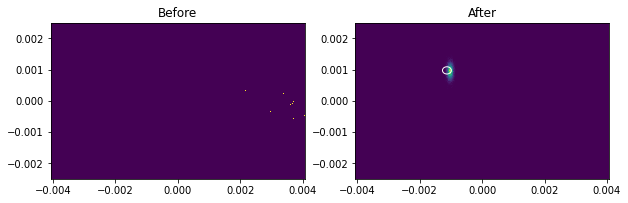

In [15]:
observation = env.reset()

before = env.segment.AREABSCR1.reading

action, _ = model.predict(observation, deterministic=True)
env.step(action)

after = env.segment.AREABSCR1.reading

print("Desired:", env.desired)

screen = env.segment.AREABSCR1

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(before, extent=screen.extent, interpolation="None")
plt.title("Before")

plt.subplot(122)
plt.imshow(after, extent=screen.extent, interpolation="None")
mu_x, mu_y, sigma_x, sigma_y = env.desired
ellipse = Ellipse((mu_x,mu_y), sigma_x, sigma_y, fill=False, color="white")
plt.gca().add_patch(ellipse)
plt.title("After")

plt.show()